In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline

from mpmath import *
import numpy as np
import pandas as pd


In [2]:
mp.dps = 80; mp.pretty = True

In [3]:
FF_frame23L = pd.read_csv('data_frames/FF_frame_23L.txt',sep='\t',
float_precision='round_trip')
FF_frame23R = pd.read_csv('data_frames/FF_frame_23R.txt',sep='\t',
float_precision='round_trip')

FF_frame13L = pd.read_csv('data_frames/FF_frame_13L.txt',sep='\t',
float_precision='round_trip')
FF_frame13R = pd.read_csv('data_frames/FF_frame_13R.txt',sep='\t',
float_precision='round_trip')

FF_frame12L = pd.read_csv('data_frames/FF_frame_12L.txt',sep='\t',
float_precision='round_trip')
FF_frame12R = pd.read_csv('data_frames/FF_frame_12R.txt',sep='\t',
float_precision='round_trip')

In [4]:
# FF_frame23L = pd.read_csv('data_frames/FF_frame_23L_zoom.txt',sep='\t',
# float_precision='round_trip')
# FF_frame23R = pd.read_csv('data_frames/FF_frame_23R_zoom.txt',sep='\t',
# float_precision='round_trip')

# FF_frame13L = pd.read_csv('data_frames/FF_frame_13L_zoom.txt',sep='\t',
# float_precision='round_trip')
# FF_frame13R = pd.read_csv('data_frames/FF_frame_13R_zoom.txt',sep='\t',
# float_precision='round_trip')

# FF_frame12L = pd.read_csv('data_frames/FF_frame_12L_zoom.txt',sep='\t',
# float_precision='round_trip')
# FF_frame12R = pd.read_csv('data_frames/FF_frame_12R_zoom.txt',sep='\t',
# float_precision='round_trip')

In [5]:
convert_to_array = lambda df,col:np.array(list(map(mpmathify,df[col])))

def mpmathify_frame(df):
    dict = {}
    for col in df:
        #print(col)
        dict[col] = convert_to_array(df,col)
        #print(dict.keys())
    #print(dict.keys())
    return pd.DataFrame(dict)

In [6]:
FF_frame23L = mpmathify_frame(FF_frame23L)
FF_frame23R = mpmathify_frame(FF_frame23R)

FF_frame13L = mpmathify_frame(FF_frame13L)
FF_frame13R = mpmathify_frame(FF_frame13R)

FF_frame12L = mpmathify_frame(FF_frame12L)
FF_frame12R = mpmathify_frame(FF_frame12R)


In [7]:
cols = ['niWW','niWG','niGW','niGG','niW','niG','Wni','Gni','Gninj','Wninj']
def total_frame(FF_df):
    FF_df['total'] = FF_df[cols].sum(axis=1)


In [8]:
total_frame(FF_frame23L)
total_frame(FF_frame23R)

total_frame(FF_frame13L)
total_frame(FF_frame13R)

total_frame(FF_frame12L)
total_frame(FF_frame12R)

In [9]:
FF_frame23L['total'][0]

(0.00000000000000000000069357554330082487910062086463476292590236639266021803730625164010874691580148011 + 0.0000000000000000000012922320548919043674940267421275207279669851757045384019975723145033630015140922j)

In [10]:
#cols = cols + ['total']
m6np = FF_frame23L['m6']

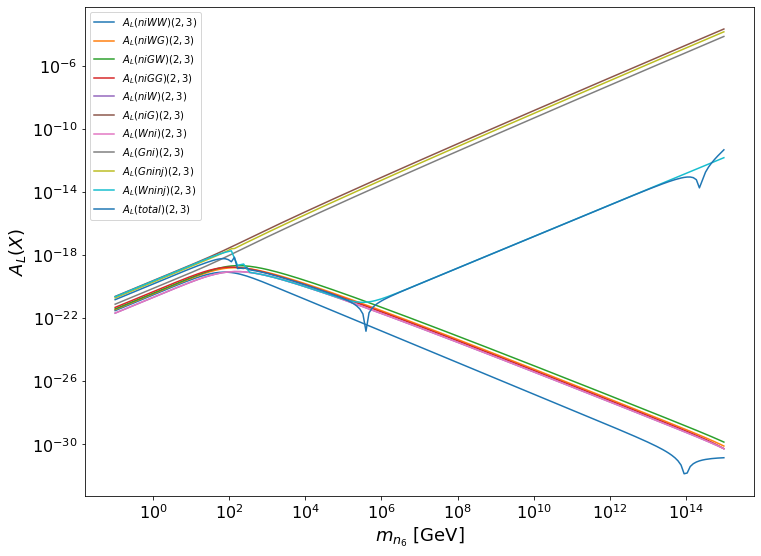

In [11]:
plt.figure(figsize=(12,9))
for dia in cols+['total']:
    plt.loglog(m6np,abs(mpmathify_frame(FF_frame23L)[dia]),label=f'$A_L({dia})(2,3)$')
plt.ylabel('$A_L(X)$',fontsize=18)
plt.xlabel('$m_{n_6}$ [GeV]',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()

In [12]:
diagG = ['Gninj','niGG','niG','Gni']
diagW = ['Wninj','niWW','niW','Wni']#'niWG','niGW'
diagWG = ['niWG','niGW']
sumaGL = 0
sumaGR = 0
sumaWL = 0
sumaWR = 0
sumaWGL = 0
sumaWGR = 0
for dia in diagG:
    sumaGL += FF_frame23L[dia]
    sumaGR += FF_frame23R[dia]
for dia in diagW:
    sumaWL += FF_frame23L[dia]
    sumaWR += FF_frame23R[dia]
for dia in diagWG:
    sumaWGL += FF_frame23L[dia]
    sumaWGR += FF_frame23R[dia]


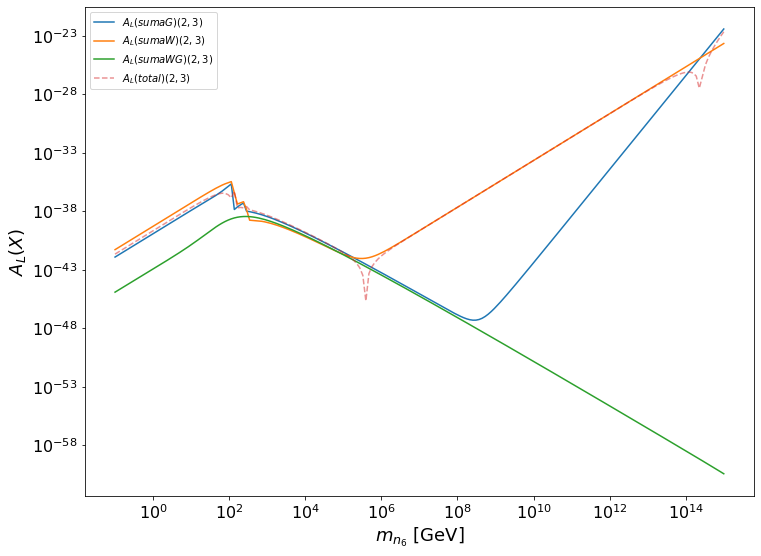

In [13]:
plt.figure(figsize=(12,9))
plt.loglog(m6np,abs(sumaGL)**2,label=f'$A_L(sumaG)(2,3)$')
plt.loglog(m6np,abs(sumaWL)**2,label=f'$A_L(sumaW)(2,3)$')
plt.loglog(m6np,abs(sumaWGL)**2,label=f'$A_L(sumaWG)(2,3)$')
plt.loglog(m6np,abs(sumaGL + sumaWL + sumaWGL)**2,'--',label=f'$A_L(total)(2,3)$',alpha=0.5)#FF_frame23L['total']
#plt.loglog(m6np,1e-34/m6np**2,label=f'$m_6^{-34}$')
plt.ylabel('$A_L(X)$',fontsize=18)
plt.xlabel('$m_{n_6}$ [GeV]',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()

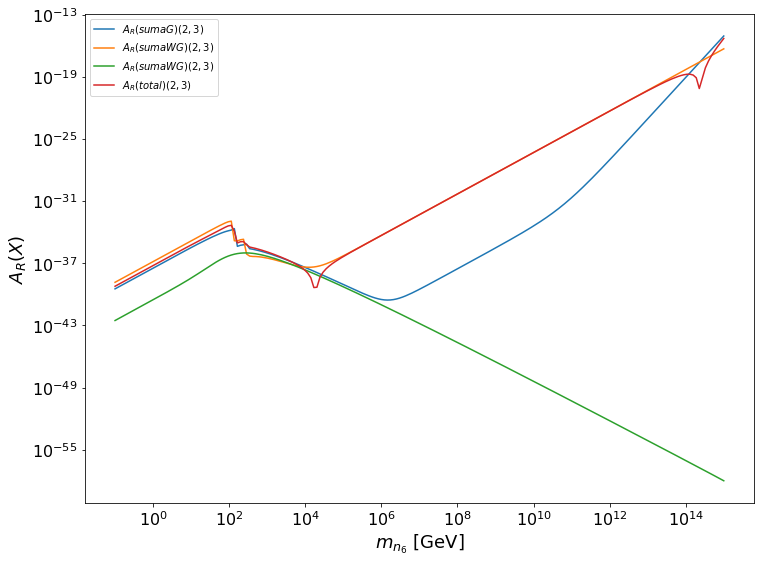

In [14]:
plt.figure(figsize=(12,9))
plt.loglog(m6np,abs(sumaGR)**2,label=f'$A_R(sumaG)(2,3)$')
plt.loglog(m6np,abs(sumaWR)**2,label=f'$A_R(sumaWG)(2,3)$')
plt.loglog(m6np,abs(sumaWGR)**2,label=f'$A_R(sumaWG)(2,3)$')
plt.loglog(m6np,abs(FF_frame23R['total'])**2,label=f'$A_R(total)(2,3)$')
# plt.loglog(m6np,1e-34/m6np**2,label=f'$m_6^{{(-34)}}$')
plt.ylabel('$A_R(X)$',fontsize=18)
plt.xlabel('$m_{n_6}$ [GeV]',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()

In [15]:
import OneLoopLFVHD as lfvhd

In [16]:
Γhlilj = lfvhd.Γhlilj
from OneLoopLFVHD.data import ml


In [17]:
Γhl2l3 =  Γhlilj(FF_frame23L['total'],FF_frame23R['total'],mpf('125.1'),ml[2],ml[3])

Γhl1l3 =  Γhlilj(FF_frame13L['total'],FF_frame13R['total'],mpf('125.1'),ml[1],ml[3])

Γhl1l2 =  Γhlilj(FF_frame12L['total'],FF_frame12R['total'],mpf('125.1'),ml[1],ml[2])

In [18]:
Γhliji_frame = pd.DataFrame({'Whl2l3':Γhl2l3,'Whl1l3':Γhl1l3,'Whl1l2':Γhl1l2})

In [19]:
Γhliji_frame = mpmathify_frame(Γhliji_frame)

In [20]:
def total_width_frame(FF_df):
    FF_df['total'] = FF_df.sum(axis=1) 
    FF_df['total'] = FF_df['total'] + mpf('0.0032')
total_width_frame(Γhliji_frame) 

In [21]:
Γhliji_frame

,Whl2l3,Whl1l3,Whl1l2,total
0,(3.0280024329569210937003743470337842130464560...,(6.7453548249932307099463667306996534877785129...,(8.8643975100028512940160054250242687818144715...,(0.0032000000000000000000000000000000000030963...
1,(4.3850525925503119293203792540303480728508167...,(9.7683897017395434827485092257132982535970086...,(1.2836636799959390314254796943764777821987168...,(0.0032000000000000000000000000000000000044840...
2,(6.3502734066808435354799627220316608866029987...,(1.4146204699857672754896743359804437222725390...,(1.8588847279096946396829547228427857998976825...,(0.0032000000000000000000000000000000000064935...
3,(9.1962059277613059637379544529650812370275475...,(2.0485907209105591759011310937835794654968500...,(2.6918602780711093162513486067515324007991860...,(0.0032000000000000000000000000000000000094037...
4,(1.3317510983832988377823387261106609386167121...,(2.9666621952697353728110178634299371423830349...,(3.8980819272366629939375507553512850163477320...,(0.0032000000000000000000000000000000000136180...
...,...,...,...,...
195,(0.0000000000000000535059517249247986872750264...,(0.0000000000000000037851449978767122383792519...,(5.7624940184979938889217863419085134536090042...,(0.0032000000000000572910967804264511106342172...
196,(0.0000000000000001540247257000300614066360062...,(0.0000000000000000095431385107564244144752662...,(0.0000000000000000000000002095270638068731922...,(0.0032000000000001635678644203135496279844647...
197,(0.0000000000000004064203159948283190750992501...,(0.0000000000000000230459750398929791740481857...,(0.0000000000000000000000006326199045853205341...,(0.0032000000000004294662916673412028344679700...
198,(0.0000000000000010129302818559500676142126276...,(0.0000000000000000539562728555903554461810187...,(0.0000000000000000000000017194149630605797725...,(0.0032000000000010668865564309553861209734190...


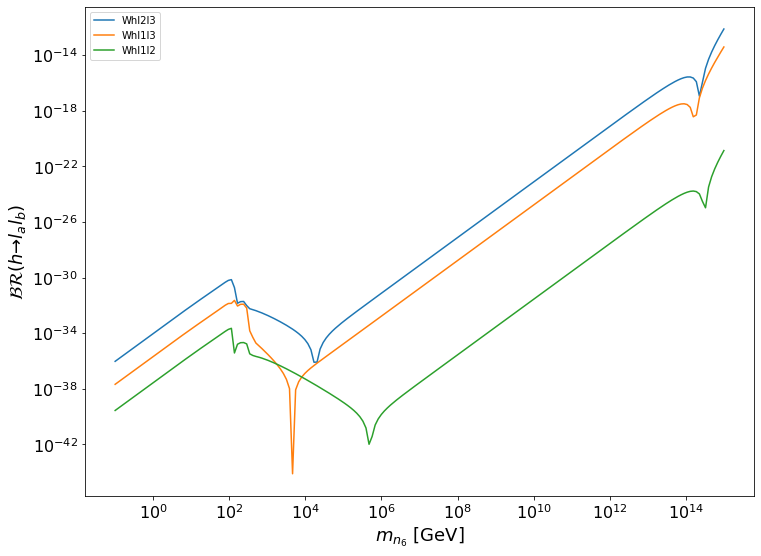

In [22]:
plt.figure(figsize=(12,9))
for width in ['Whl2l3','Whl1l3','Whl1l2']:
    plt.loglog(m6np,abs(Γhliji_frame[width]/Γhliji_frame['total']),label=width)

plt.ylabel(r'$\mathcal{BR}(h \to l_a l_b)$',fontsize=18)
plt.xlabel('$m_{n_6}$ [GeV]',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()

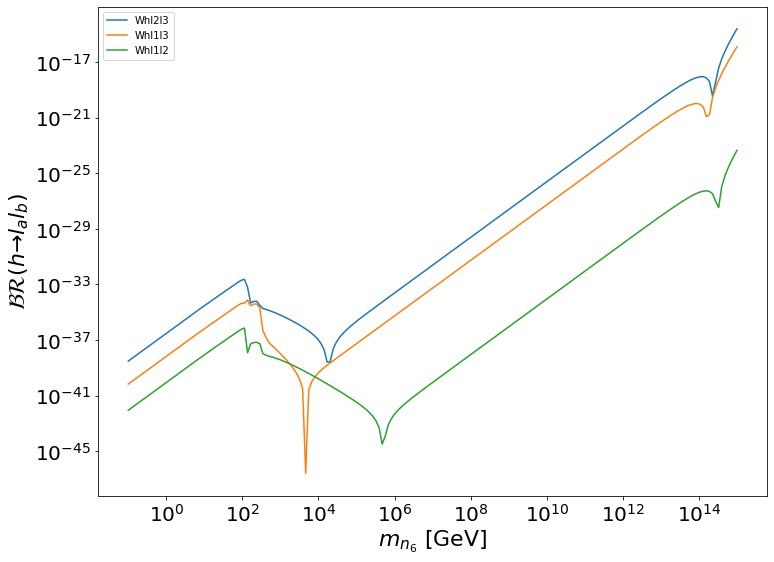

In [23]:
plt.figure(figsize=(12,9))
for width in ['Whl2l3','Whl1l3','Whl1l2']:
    plt.loglog(m6np,abs(Γhliji_frame[width]),label=width)

plt.ylabel(r'$\mathcal{BR}(h \to l_a l_b)$',fontsize=22)
plt.xlabel('$m_{n_6}$ [GeV]',fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()

In [24]:
ALG = 0
ARG = 0
for width in diagG:
    ALG += FF_frame23L[width]
    ARG += FF_frame23R[width]

ALW = 0
ARW = 0
for width in diagW:
    ALW += FF_frame23L[width]
    ARW += FF_frame23R[width]

ALWG = 0
ARWG = 0
for width in diagWG:
    ALWG += FF_frame23L[width]
    ARWG += FF_frame23R[width]



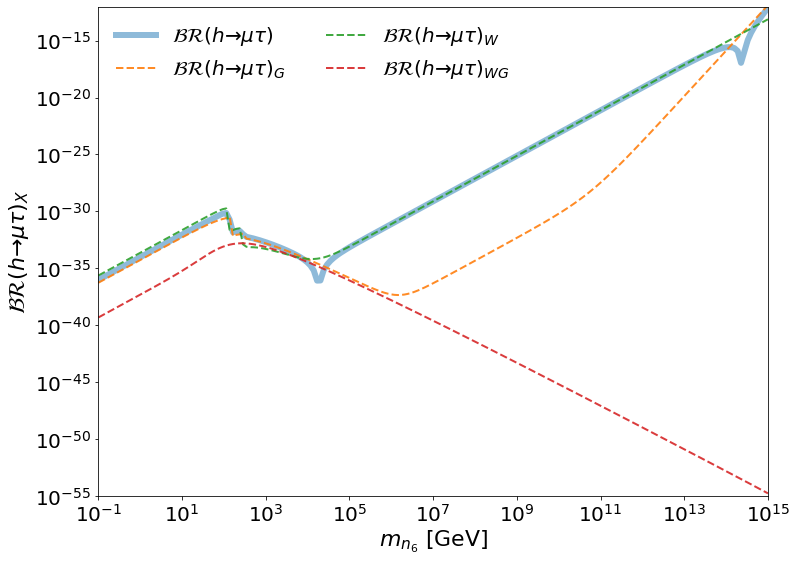

In [25]:

#with plt.style.context('seaborn-deep'):
plt.figure(figsize=(12,9))

plt.loglog(m6np,abs(Γhliji_frame['Whl2l3']/Γhliji_frame['total']),'-',
label=r'$\mathcal{BR}(h \to \mu \tau)$',alpha=0.5,linewidth=6)

plt.loglog(m6np,abs(
    Γhlilj(ML=ALG,MR=ARG,ma=mpf('125.1'),mi=ml[2],mj=ml[3])/Γhliji_frame['total']
        ),'--',label=r'$\mathcal{{BR}}(h \to \mu \tau)_{G}$',linewidth=2,alpha=0.9)

plt.loglog(m6np,abs(
    Γhlilj(ML=ALW,MR=ARW,ma=mpf('125.1'),mi=ml[2],mj=ml[3])/Γhliji_frame['total']
        ),'--',label=r'$\mathcal{{BR}}(h \to \mu \tau)_{W}$',linewidth=2,alpha=0.9)

plt.loglog(m6np,abs(
    Γhlilj(ML=ALWG,MR=ARWG,ma=mpf('125.1'),mi=ml[2],mj=ml[3])/Γhliji_frame['total']
        ),'--',label=r'$\mathcal{{BR}}(h \to \mu \tau)_{WG}$',linewidth=2,alpha=0.9)



# plt.loglog(m6np,1e-34*m6np**2,'--',label='$10^{-34}m_{n_6}^2$',linewidth=2,
# alpha=0.6)
# plt.loglog(m6np,1e-43*m6np**2,'--',label='$10^{-43}m_{n_6}^2$',linewidth=2,
# alpha=0.6)
# plt.loglog(m6np,1e-72*m6np**4,'--',label='$10^{-72}m_{n_6}^4$',linewidth=2,
# alpha=0.6)

#plt.vlines(2*125 + 1.77686 + 0.10566,1e-38,1e-29,'b',label='$2 m_h$')
#plt.vlines(125.1 + 1.77686 + 0.10566,1e-38,1e-29,'r',label='$m_h$')
#plt.vlines(2*80.379 - 2*1.77686 - 2*0.10566,1e-38,1e-29,'g',label='$2 m_W$')


######################################
#plt.xticks([1,125.1,1e4,1e8,1e12,1e15],
            #['1','$m_h$','$10^4$','$10^8$','$10^{12}$','$10^{15}$'],fontsize=20)
#plt.yticks([1e-49,1e-39,1e-29,1e-19,1e-9],fontsize=20)

###################333
# plt.vlines(125.1,1e-35,1e-29,'r')
# plt.vlines(125.1+2*80.379,1e-35,1e-29,'b')
# plt.vlines(2*125.1,1e-35,1e-29,'g')
# plt.vlines(2*80.379,1e-35,1e-29,'y')

plt.ylabel(r'$\mathcal{BR}(h \to \mu \tau)_{X}$',fontsize=22)
plt.xlabel('$m_{n_6}$ [GeV]',fontsize=22)
plt.ylim(1e-55,1e-12)
plt.xlim(1e-1,1e15)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(ncol=2,fontsize=20,frameon=False)
plt.savefig('data_frames\BRhl2l3_contributions.png',dpi=200)

In [26]:
ml

{1: 0.000511, 2: 0.10566, 3: 1.77686}

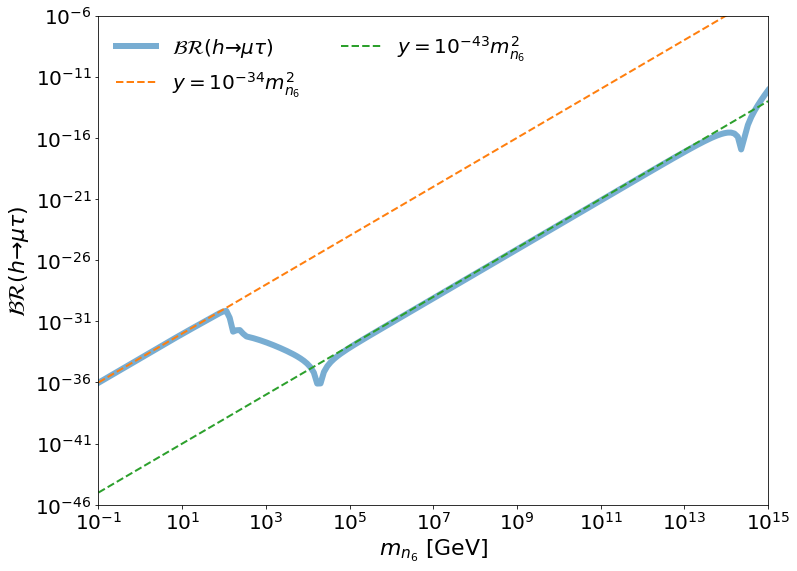

In [27]:
plt.figure(figsize=(12,9))

plt.loglog(m6np,abs(Γhliji_frame['Whl2l3']/Γhliji_frame['total']),'-',
label=r'$\mathcal{{BR}}(h \to \mu \tau)$',alpha=0.6,linewidth=6)

# plt.loglog(m6np,abs(
#     Γhlilj(ML=ALG,MR=ARG,ma=mpf('125.1'),mi=ml[2],mj=ml[3])/Γhliji_frame['total']
#         ),'-',label=r'$\mathcal{{BR}}(h \to \mu \tau)_{G}$',linewidth=3,alpha=0.7)

# plt.loglog(m6np,abs(
#     Γhlilj(ML=ALW,MR=ARW,ma=mpf('125.1'),mi=ml[2],mj=ml[3])/Γhliji_frame['total']
#         ),'-',label=r'$\mathcal{{BR}}(h \to \mu \tau)_{W}$',linewidth=3,alpha=0.7)

# plt.loglog(m6np,abs(
#     Γhlilj(ML=ALWG,MR=ARWG,ma=mpf('125.1'),mi=ml[2],mj=ml[3])/Γhliji_frame['total']
#         ),'-',label=r'$\mathcal{{BR}}(h \to \mu \tau)_{WG}$',linewidth=3,alpha=0.7)



plt.loglog(m6np,1e-34*m6np**2,'--',label='$y = 10^{-34}m_{n_6}^2$',linewidth=2,
alpha=1)
plt.loglog(m6np,1e-43*m6np**2,'--',label='$y = 10^{-43}m_{n_6}^2$',linewidth=2,
alpha=1)
#plt.loglog(m6np,1e-72*m6np**4,'--',label='$10^{-72}m_{n_6}^4$',linewidth=2,alpha=0.6)


###################################################
# plt.xticks([1,125.1,1e4,1e8,1e12,1e15],
#             ['1','$m_h$','$10^4$','$10^8$','$10^{12}$','$10^{15}$'],fontsize=20)
# plt.yticks([1e-49,1e-39,1e-29,1e-19,1e-9],fontsize=20)

plt.ylim(1e-46,1e-6)
plt.xlim(1e-1,1e15)
#####################################################
plt.ylabel(r'$\mathcal{BR}(h \to \mu \tau)$',fontsize=22)
plt.xlabel('$m_{n_6}$ [GeV]',fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(ncol=2,fontsize=20,frameon=False)
plt.savefig('data_frames\BRhl2l3_pendientes.png',dpi=200)

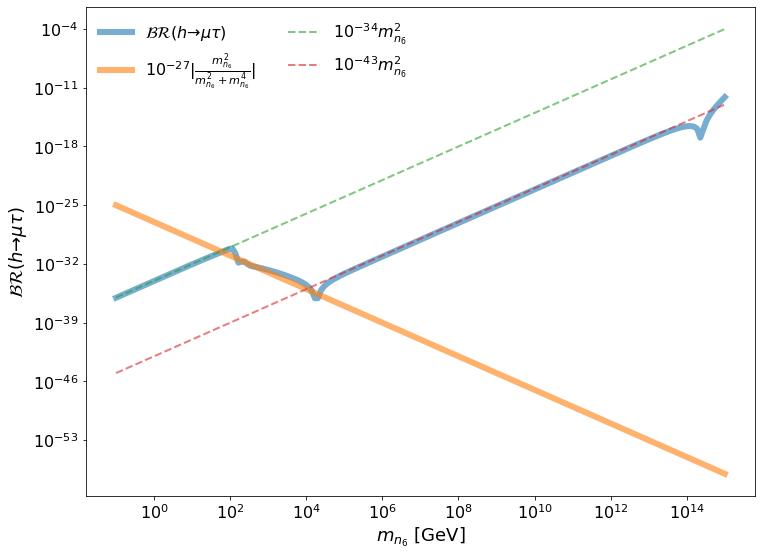

In [29]:
plt.figure(figsize=(12,9))

plt.loglog(m6np,abs(Γhliji_frame['Whl2l3']/Γhliji_frame['total']),'-',
label=r'$\mathcal{{BR}}(h \to \mu \tau)$',alpha=0.6,linewidth=6)

plt.loglog(m6np,10**(-27)*abs(1/(m6np**2)),'-',
label=r'$10^{-27}|\frac{m_{n_6}^2}{m_{n_6}^2+ m_{n_6}^4}|$',alpha=0.6,linewidth=6)

plt.loglog(m6np,1e-34*m6np**2,'--',label='$10^{-34}m_{n_6}^2$',linewidth=2,
alpha=0.6)
plt.loglog(m6np,1e-43*m6np**2,'--',label='$10^{-43}m_{n_6}^2$',linewidth=2,
alpha=0.6)
#plt.loglog(m6np,1e-72*m6np**4,'--',label='$10^{-72}m_{n_6}^4$',linewidth=2,alpha=0.6)


###################################################
# plt.xticks([1,125.1,1e4,1e8,1e12,1e15],
#             ['1','$m_h$','$10^4$','$10^8$','$10^{12}$','$10^{15}$'],fontsize=20)
# plt.yticks([1e-49,1e-39,1e-29,1e-19,1e-9],fontsize=20)

# plt.ylim(1e-49,1e-9)
# plt.xlim(1e-1,1e15)
#####################################################
plt.ylabel(r'$\mathcal{BR}(h \to \mu \tau)$',fontsize=18)
plt.xlabel('$m_{n_6}$ [GeV]',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(ncol=2,fontsize=16,frameon=False)
#plt.savefig('data_frames\BRhl2l3_pendientes.png',dpi=200)

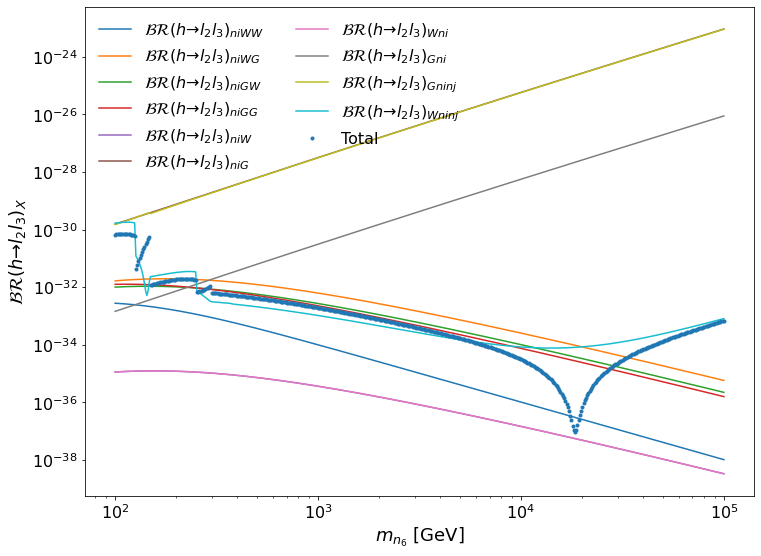

In [29]:
plt.figure(figsize=(12,9))
for width in cols:
    plt.loglog(m6np,abs(
        Γhlilj(
            FF_frame23L[width],FF_frame23R[width],mpf('125.1'),ml[2],ml[3]
            )/Γhliji_frame['total']
        ),label=fr'$\mathcal{{BR}}(h \to l_2 l_3)_{{{width}}}$')
plt.loglog(m6np,abs(Γhliji_frame['Whl2l3']/Γhliji_frame['total']),'.',label='Total')

plt.ylabel(r'$\mathcal{BR}(h \to l_2 l_3)_{X}$',fontsize=18)
plt.xlabel('$m_{n_6}$ [GeV]',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(ncol=2,fontsize=16,frameon=False)

In [30]:
def Whlilj(AL,AR):
    mh = mpf('125.1')
    return (mh/8*mp.pi)*(abs(AL)**2 + abs(AR)**2)

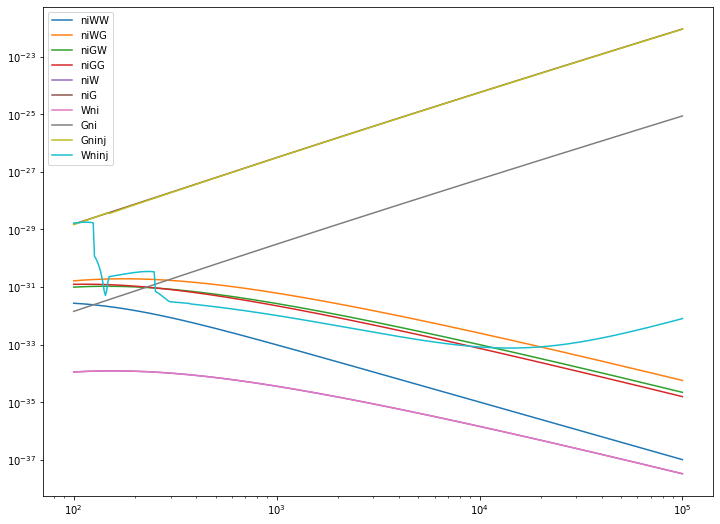

In [31]:
plt.figure(figsize=(12,9))
for width in cols:
    plt.loglog(m6np,abs(
        Whlilj(
            FF_frame23L[width],FF_frame23R[width]
            )/Γhliji_frame['total']
        ),label=width)
plt.legend()